In [1]:
#!pip install mediapipe 

In [11]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [12]:
imagePath = './imgs/random.jpg'

Image shape: (339, 509, 3)


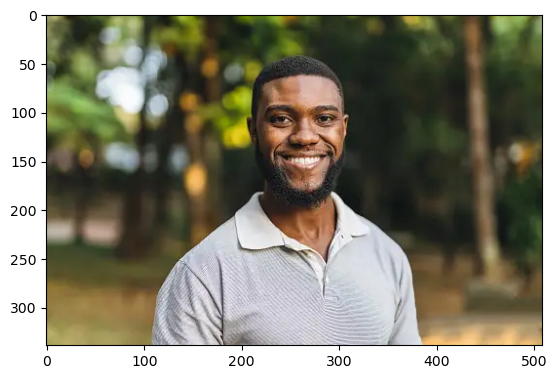

In [16]:
img = cv2.imread(imagePath)

print("Image shape:", img.shape)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('on')  
plt.show()

In [15]:
mp_face_mesh = mp.solutions.face_mesh

with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
) as face_mesh:
    result = face_mesh.process(img)

    if result.multi_face_landmarks:
        for face_landmarks in result.multi_face_landmarks:
            print(face_landmarks)
    else:
        print("No faces detected.")


No faces detected.
